<a href="https://colab.research.google.com/github/Eddy265/PORTFOLIO-/blob/main/A_B_test_marketing_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')
import io

Scenario A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

Goal Evaluate A/B testing results and decide which marketing strategy works the best.

Columns

MarketID: unique identifier for market

MarketSize: size of market area by sales

LocationID: unique identifier for store location

AgeOfStore: age of store in years

Promotion: one of three promotions that were tested

week: one of four weeks when the promotions were run

SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [3]:
!pip install google-colab

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ab_test.csv']), index_col= 'MarketID')
df

,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,,,,,,
1,Medium,1,4,3,1,33.73
1,Medium,1,4,3,2,35.67
1,Medium,1,4,3,3,29.03
1,Medium,1,4,3,4,39.25
1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...
10,Large,919,2,1,4,64.34
10,Large,920,14,2,1,50.20
10,Large,920,14,2,2,45.75


In [ ]:
df.describe()

,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 1 to 10
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketSize        548 non-null    object 
 1   LocationID        548 non-null    int64  
 2   AgeOfStore        548 non-null    int64  
 3   Promotion         548 non-null    int64  
 4   week              548 non-null    int64  
 5   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 30.0+ KB


In [ ]:
df.isnull().sum()

MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

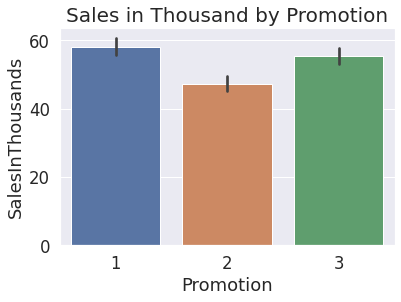

In [ ]:
#Total Sales - Overall Dataset
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='SalesInThousands', data=df)
plt.title("Sales in Thousand by Promotion", fontdict={'fontsize': 20})
plt.show()

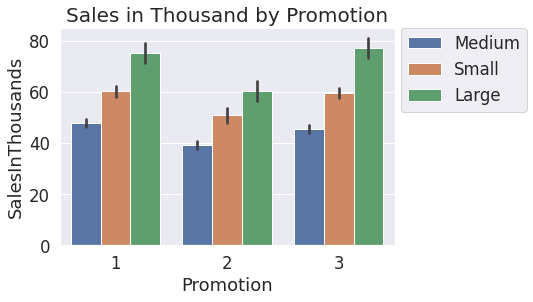

In [ ]:
#Total Sales - By MarketSize
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='SalesInThousands', data=df, hue='MarketSize')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Sales in Thousand by Promotion", fontdict={'fontsize': 20})
plt.show()

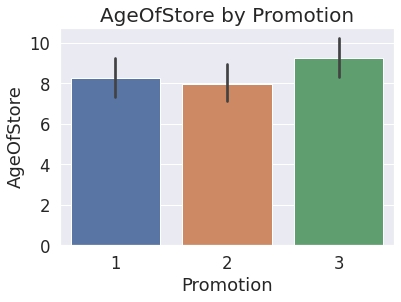

In [ ]:
#Age of Storein the ver all dataset
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='AgeOfStore', data=df)
plt.title("AgeOfStore by Promotion", fontdict={'fontsize': 20})
plt.show()

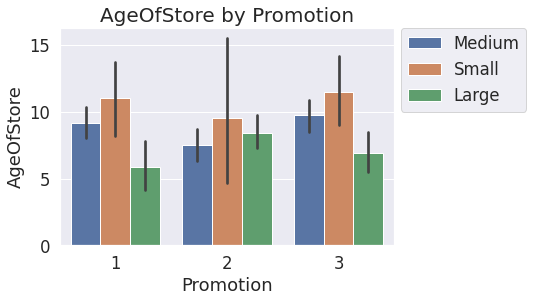

In [ ]:
#Age of Store - By MarketSize
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='AgeOfStore', data=df, hue='MarketSize')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("AgeOfStore by Promotion", fontdict={'fontsize': 20})
plt.show()

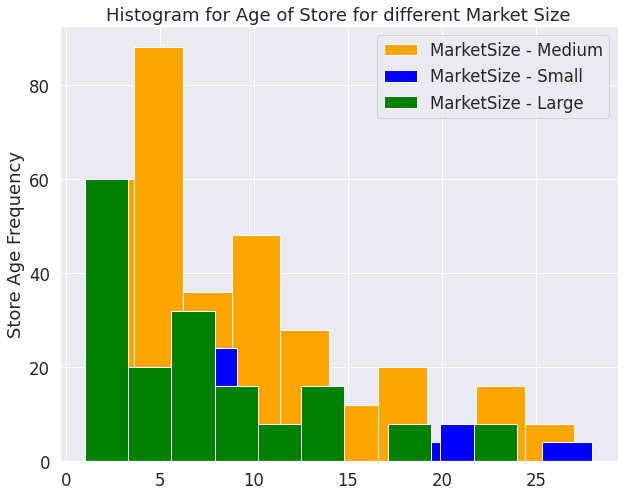

In [ ]:
#Plot the distribution of Age of Store by Market Size
fig=plt.figure(figsize=(10,8))
plt.ylabel('Store Age Frequency')
plt.hist(np.array(df[df['MarketSize'] =='Medium']['AgeOfStore']), color='orange')
plt.hist(np.array(df[df['MarketSize'] =='Small']['AgeOfStore']), color='blue')
plt.hist(np.array(df[df['MarketSize'] =='Large']['AgeOfStore']), color='green')
plt.legend(['MarketSize - Medium','MarketSize - Small','MarketSize - Large'])
plt.title("Histogram for Age of Store for different Market Size")
plt.show()

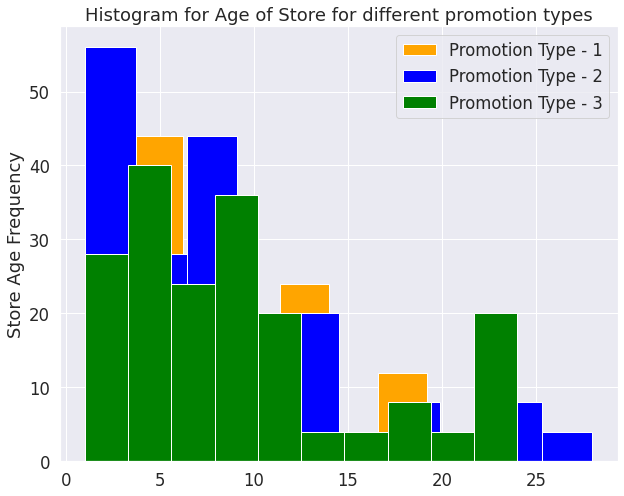

In [ ]:
#Plot the distribution of Age of Store by Promotion Type
fig=plt.figure(figsize=(10,8))
plt.ylabel('Store Age Frequency')
plt.hist(np.array(df[df['Promotion'] ==1]['AgeOfStore']), color='orange')
plt.hist(np.array(df[df['Promotion'] ==2]['AgeOfStore']), color='blue')
plt.hist(np.array(df[df['Promotion'] ==3]['AgeOfStore']), color='green')
plt.legend(['Promotion Type - 1','Promotion Type - 2','Promotion Type - 3'])
plt.title("Histogram for Age of Store for different promotion types")
plt.show()

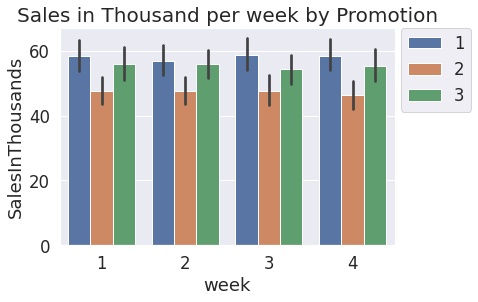

In [ ]:
#Sales look same across each week.Lets look for each promotion type as well

sns.set(font_scale=1.5)
sns.barplot(x='week', y='SalesInThousands', data=df, hue='Promotion')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Sales in Thousand per week by Promotion", fontdict={'fontsize': 20})
plt.show()

In [ ]:
#Distribution of Sales by Promotion Size
data=[np.array(df[df['Promotion'] ==1]['SalesInThousands']),np.array(df[df['Promotion'] ==2]['SalesInThousands']),np.array(df[df['Promotion'] ==3]['SalesInThousands'])]

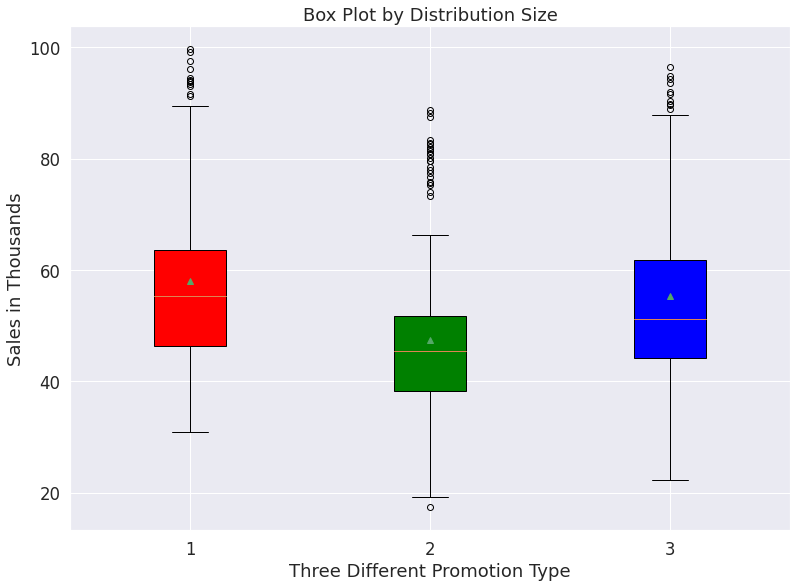

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1,1])
bp=ax.boxplot(data, vert=True, patch_artist=True, showmeans=True)
ax.set_title("Box Plot by Distribution Size")

#Fill with colors
colors=['red', 'green', 'blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


#Adding Horizontal Grid Lines
ax.yaxis.grid(True)
ax.set_xlabel('Three Different Promotion Type')
ax.set_ylabel('Sales in Thousands')
plt.show()

#Since we are comparing 3 means, we need to use One Way ANOVA test. There are three assumptions for ANOVA test.

1.The responses for each factor level have a normal population distribution. 

2.These distributions have the same variance.

In [ ]:
#Checking for homogeneity of variance test
stats.levene(df[df['Promotion'] ==1]['SalesInThousands'],
             df[df['Promotion'] ==2]['SalesInThousands'],
             df[df['Promotion'] ==3]['SalesInThousands'])

LeveneResult(statistic=1.2696787527507418, pvalue=0.2817514565692118)

Since the P-value is greater than 10%, we fail to reject the Null hypothesis that variance are same across all three groups. Lets check for normality assumption. We will start with visual plot

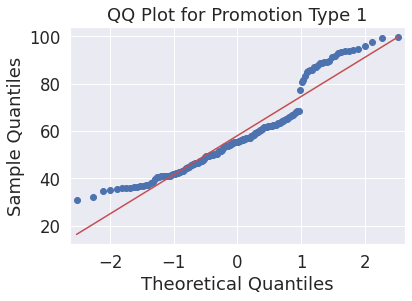

In [ ]:
qqplot(np.array(df[df['Promotion'] ==1]['SalesInThousands']), line='s')
plt.title("QQ Plot for Promotion Type 1")
plt.show()

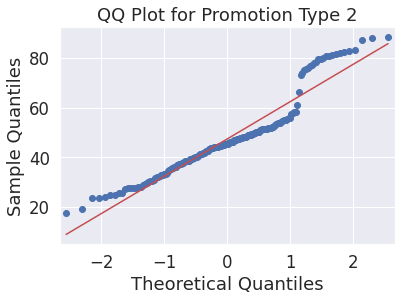

In [ ]:
qqplot(np.array(df[df['Promotion'] ==2]['SalesInThousands']), line='s')
plt.title("QQ Plot for Promotion Type 2")
plt.show()

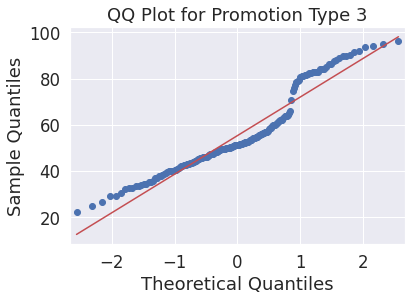

In [ ]:
qqplot(np.array(df[df['Promotion'] ==3]['SalesInThousands']), line='s')
plt.title("QQ Plot for Promotion Type 3")
plt.show()

The chart looks normal with no clear outlier. We will perform Normality test to verify the assumption